This notebook presents the calculation, figures and supplementary figures for section 4.5 of the paper. 

In [2]:
%pip install sklearn
%pip install openml
%pip install openml

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-pypi-packag

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [8]:
import sklearn
import openml as oml
import comparison_local_influences as cli
import xgboost as xgb

<font size="5">
    For the medical dataset, SA-Heart, we show results for each model. Results for Random Forests are the same than shown in the paper, except that we present all PDPs here.
</font>

In [6]:
dataset = oml.datasets.get_dataset(1498) #SA-Heart
X, y, categorical_indicator, attribute_names = dataset.get_data(
    dataset_format='dataframe',
    target=dataset.default_target_attribute
)
dict_features = {'V1':'systolic blood pressure', 'V2':'cumulative tobacco', 'V3':'low density lipoprotein cholesterol', 'V4':'adiposity', 'V5':'family history of heart disease', 'V6':'type-A behavior', 'V7':'obesity', 'V8':'current alcohol consumption', 'V9':'age'}
X = X.rename(dict_features, axis=1)

X["family history of heart disease"] = X["family history of heart disease"].replace({"1":1,"2":0}).astype(int)
y = y.replace({"1":0,"2":1})    

C:\Users\tyler\AppData\Local\Temp\ipykernel_2120\4195265689.py:1: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  dataset = oml.datasets.get_dataset(1498) #SA-Heart


In [11]:
%%time
models = {"Random Forests":sklearn.ensemble.RandomForestClassifier(),"SVM":sklearn.svm.SVC(probability=True),"Logistic Regression":sklearn.linear_model.LogisticRegression(),"XGBoost":xgb.XGBClassifier(use_label_encoder=False, eval_metric="logloss",n_jobs=1)}
dict_bootstrap_0 = cli.dataset_test_bootstrap(2, X, y, models, test_size=0.2, problem_type="Classification", mode="classification", fvoid=None, look_at=1, rate=0.25, n_background_samples=10)

AttributeError: 'Categorical' object has no attribute 'flatten'

In [38]:
#pickle.dump(dict_bootstrap_0,open("pickles/results_SA_Heart.pkl", "wb"))
dict_bootstrap_0 = pickle.load(open("pickles/results_SA_Heart.pkl","rb"))

In [39]:
dict_names_reducted = {"cumulative tobacco":"tobacco",
                       "low density lipoprotein cholesterol":"ldlc", 
                       "family history of heart disease":"family",
                       "current alcohol consumption":"alcohol",
                       "systolic blood pressure":"sbp",
                       "type-A behavior":"type-A"}

In [40]:
models = ['Random Forests', 'SVM', 'Logistic Regression', 'XGBoost']
del dict_bootstrap_0['Mean']["XGBoost"]["treeSHAPapprox"]
dict_list_shap_values = {model:[pd.DataFrame(dict_bootstrap_0['Mean'][model][method]["inf"],columns=X.rename(dict_names_reducted, axis=1).columns) for method in dict_bootstrap_0['Mean'][model] if not method.endswith("accuracy")] for model in models}

# Random Forests

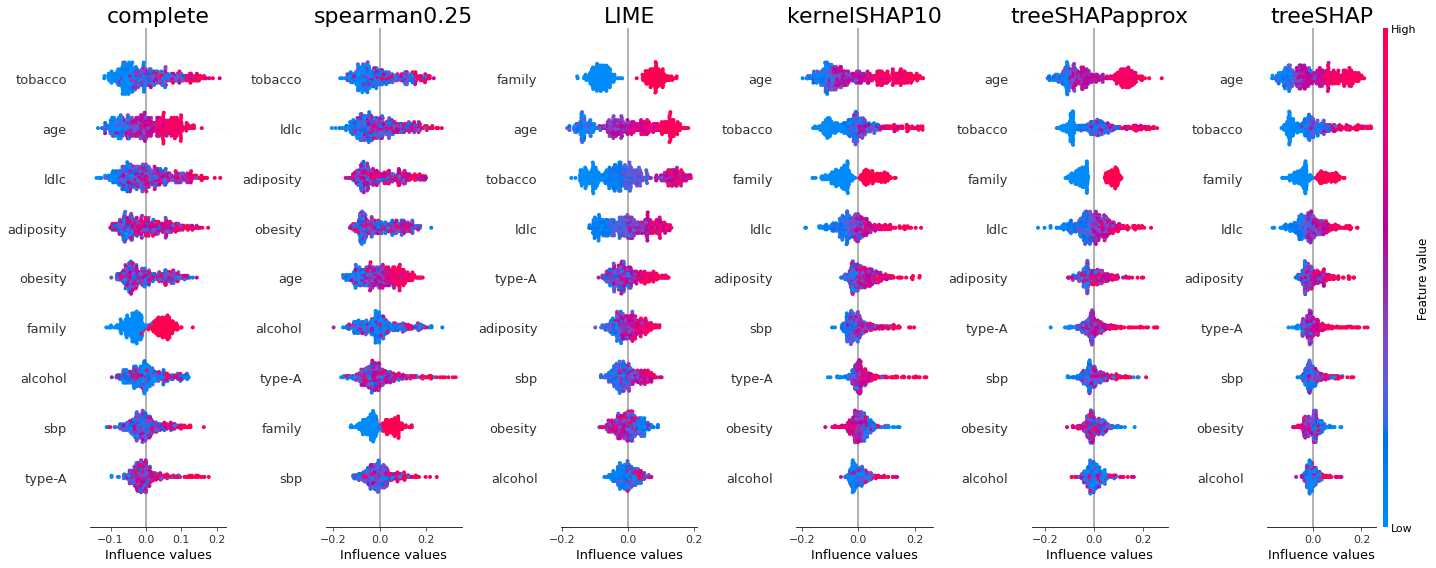

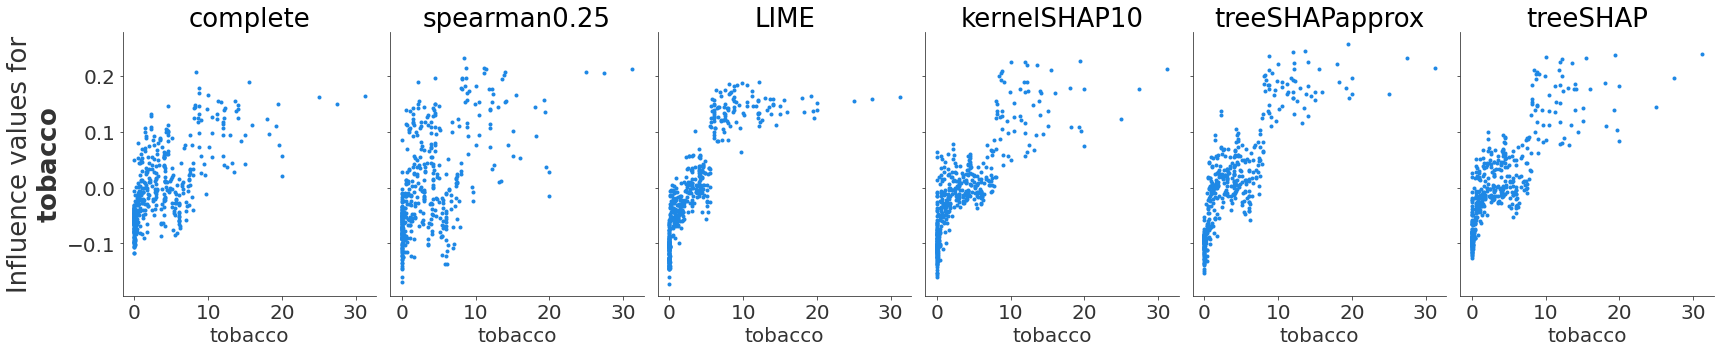

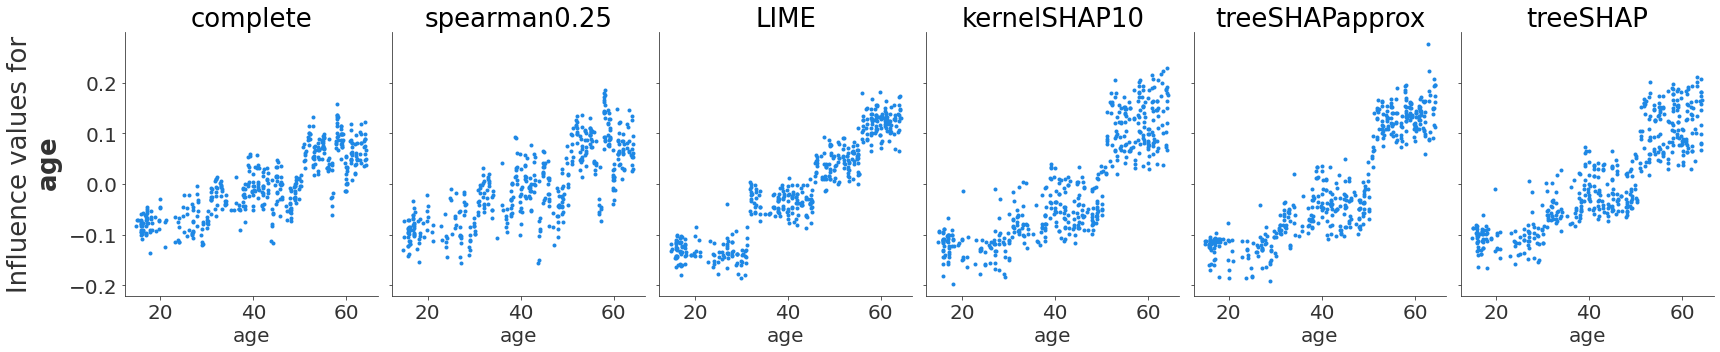

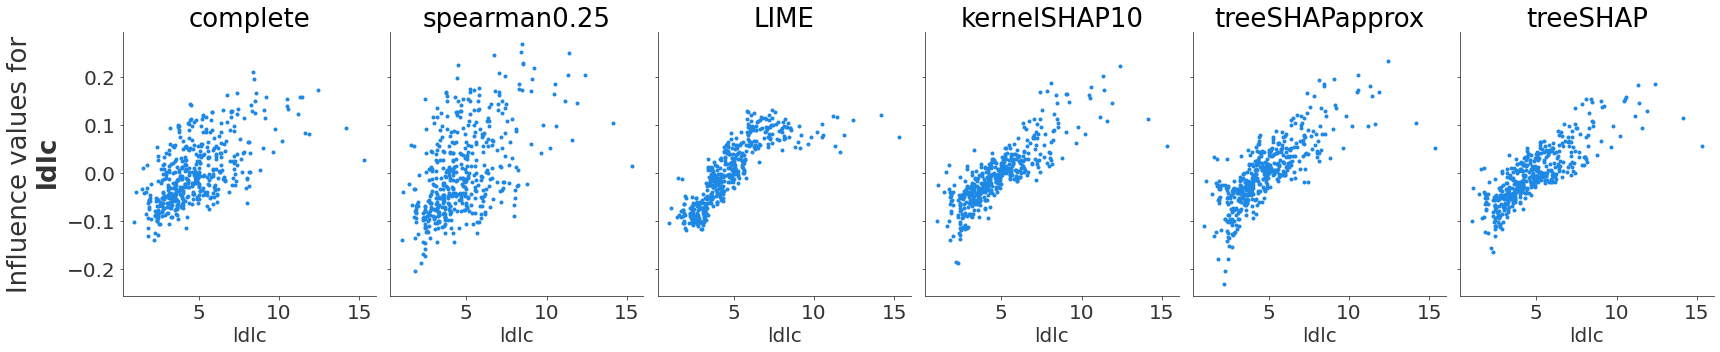

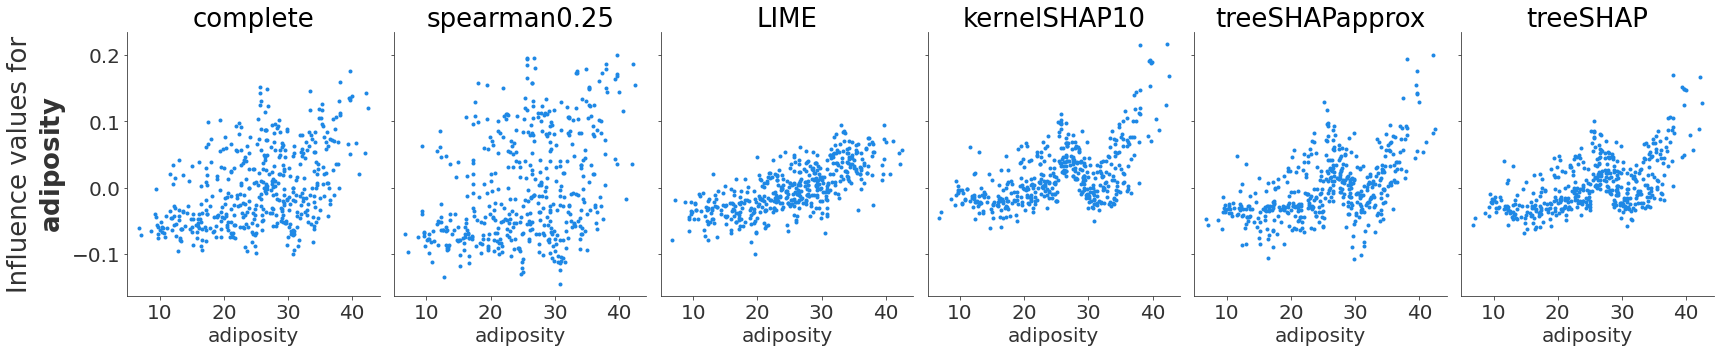

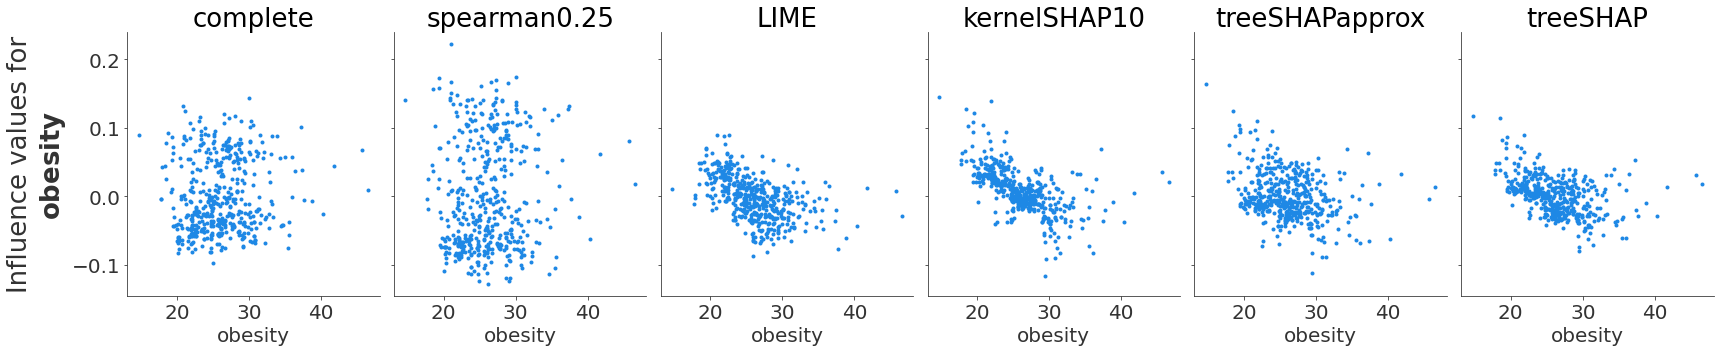

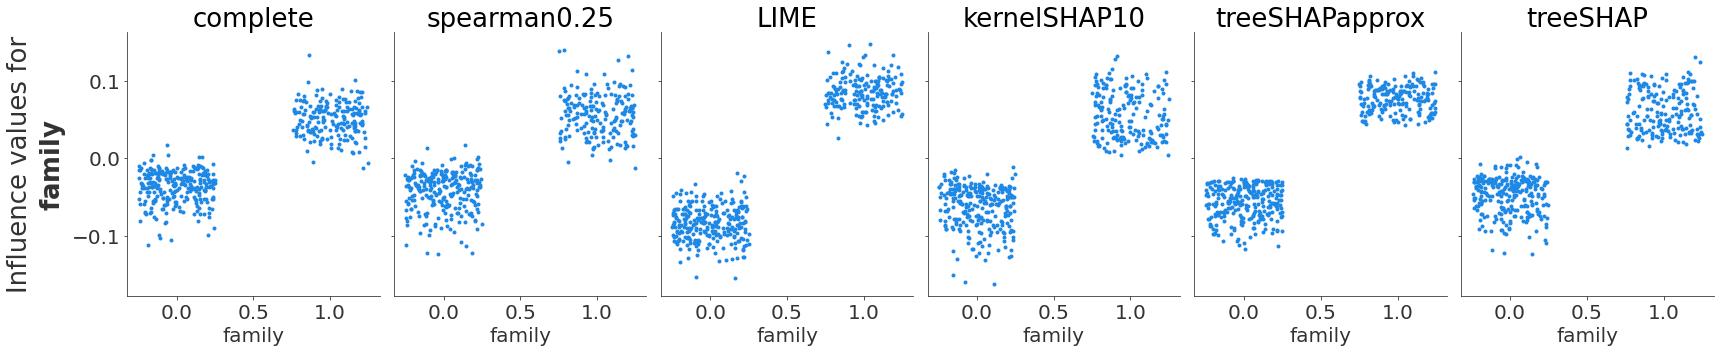

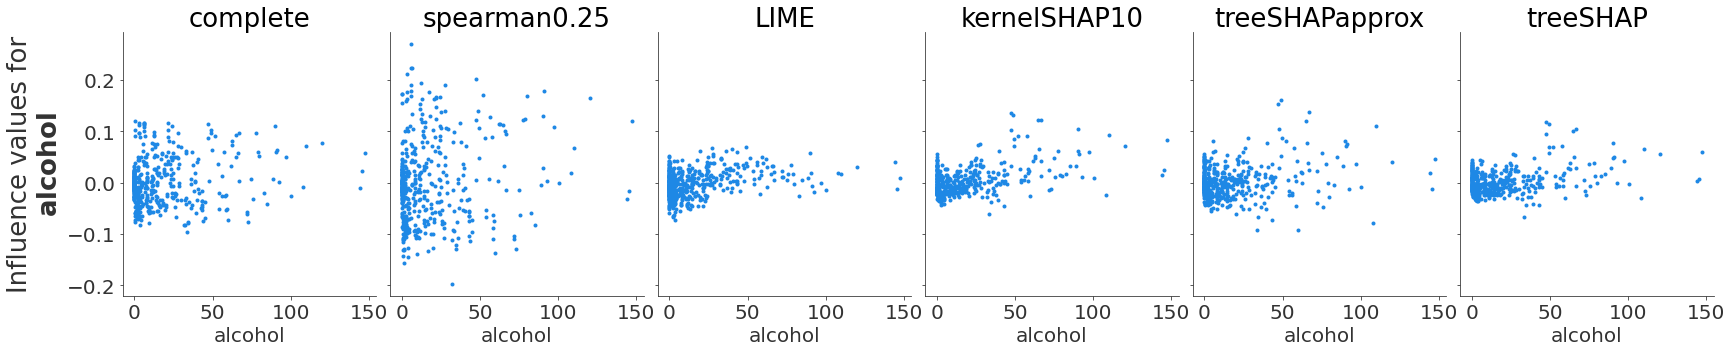

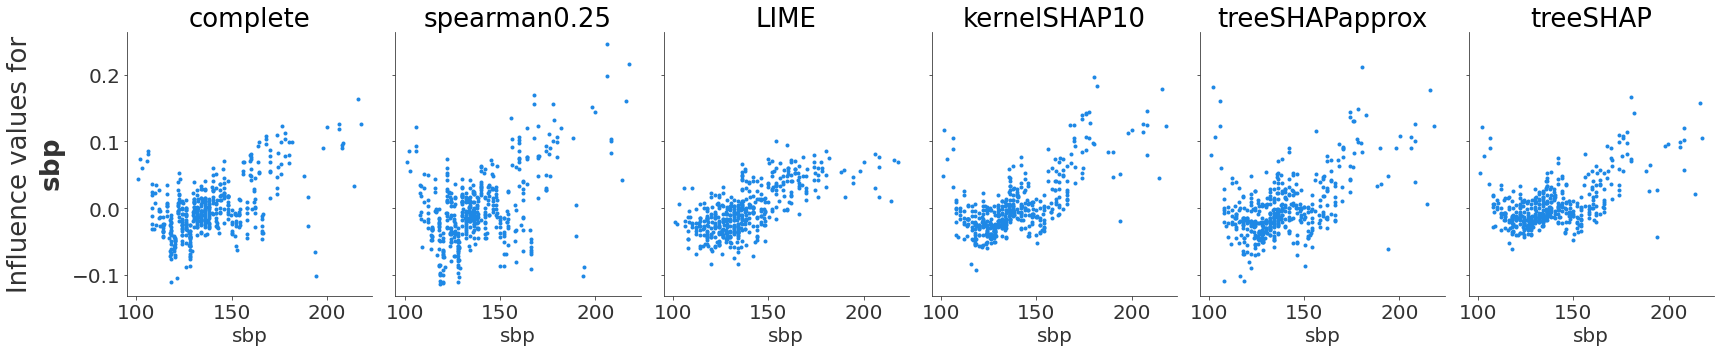

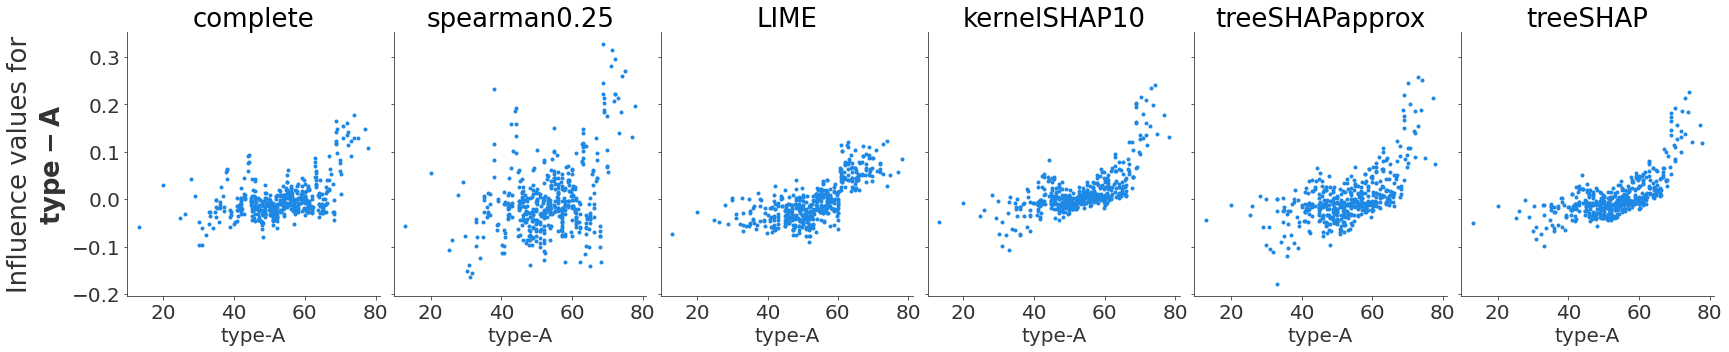

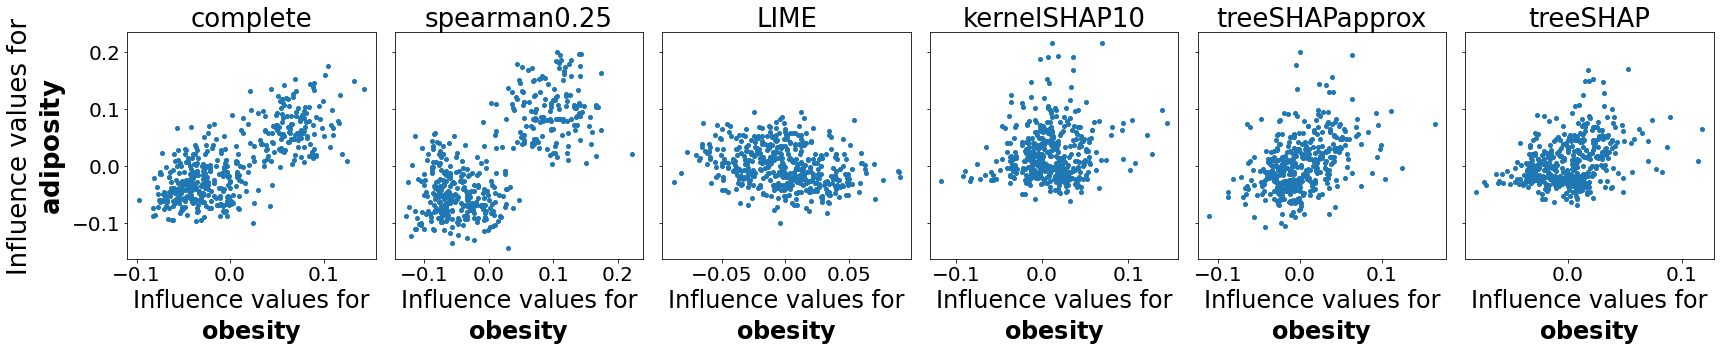

In [45]:
methods = [method for method in dict_bootstrap_0['Mean']["Random Forests"] if not method.endswith("accuracy")]
cli.summary_subplots(dict_list_shap_values["Random Forests"], X.rename(dict_names_reducted, axis=1), list_names=methods)
cli.partial_dependance_plots(dict_list_shap_values["Random Forests"],X.rename(dict_names_reducted, axis=1),list_names=methods)#, save_path="figures/SA_Heart/"+model+"/")
cli.interaction_dependence_plots(dict_list_shap_values["Random Forests"],[('obesity','adiposity')],X,list_names=methods)#, save_path="figures/SA_Heart/"+model+"/")

# XGBoost

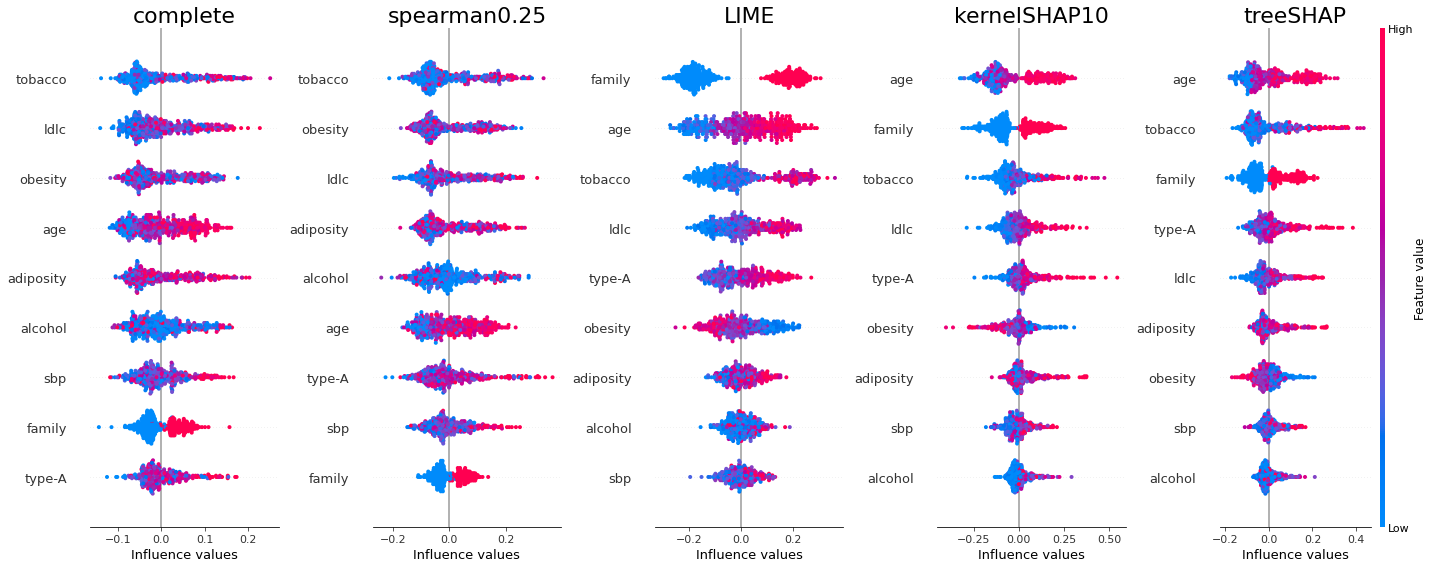

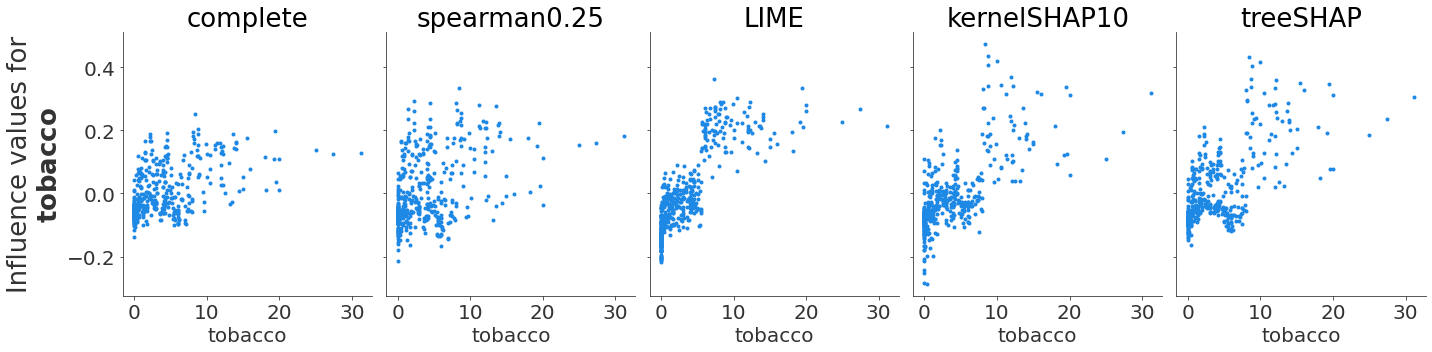

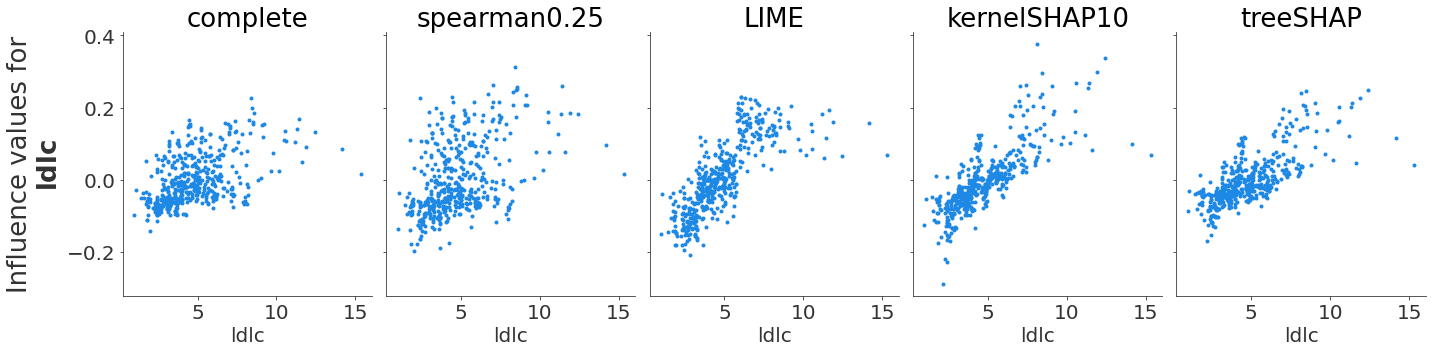

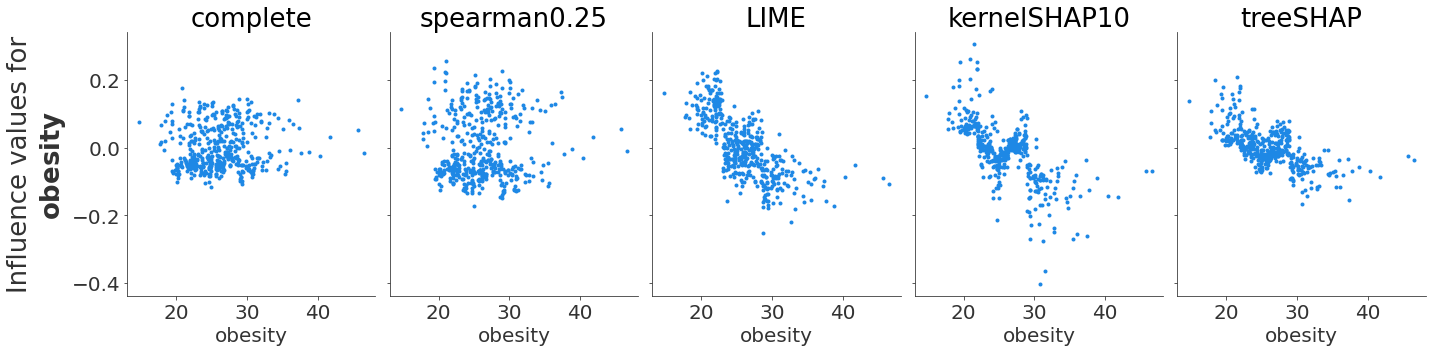

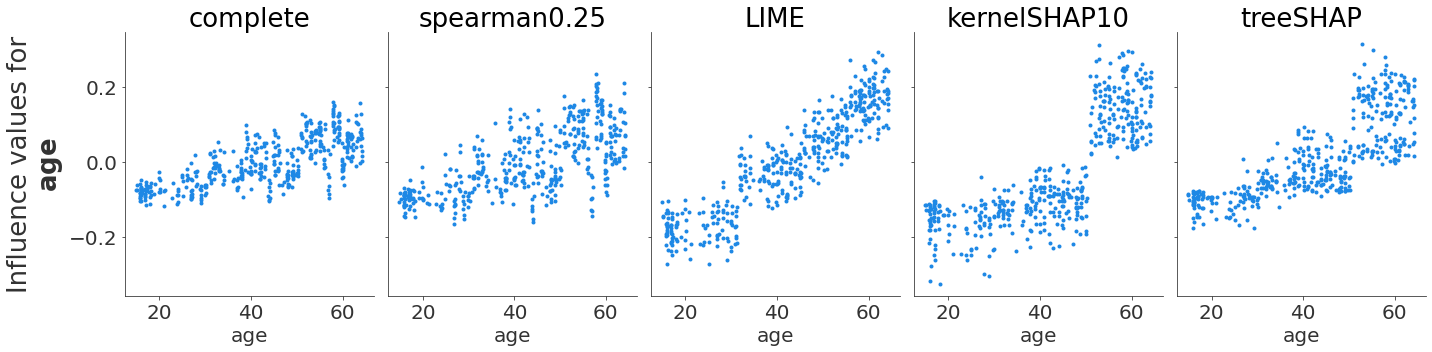

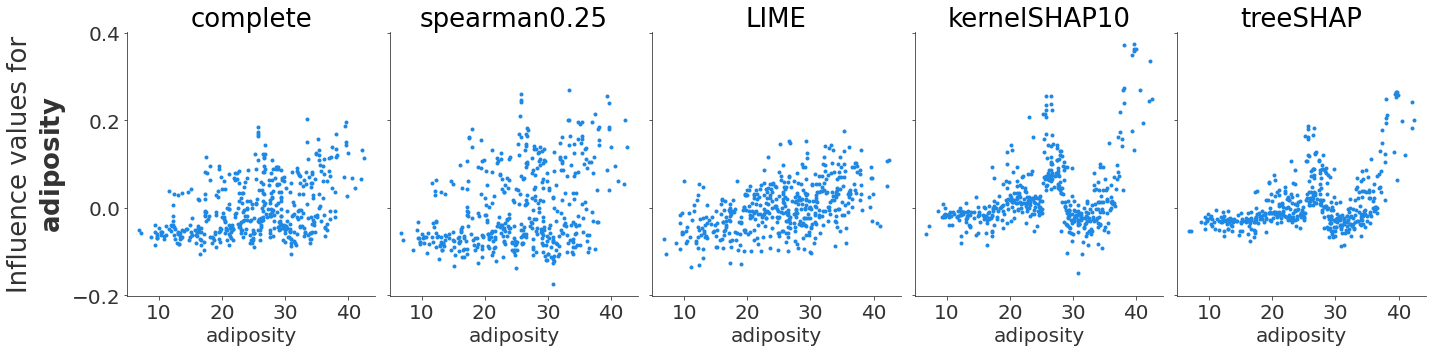

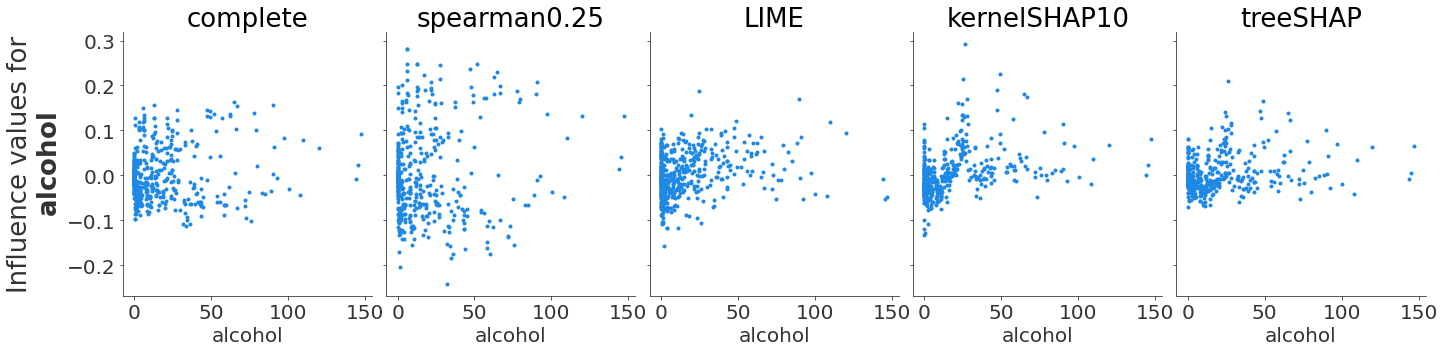

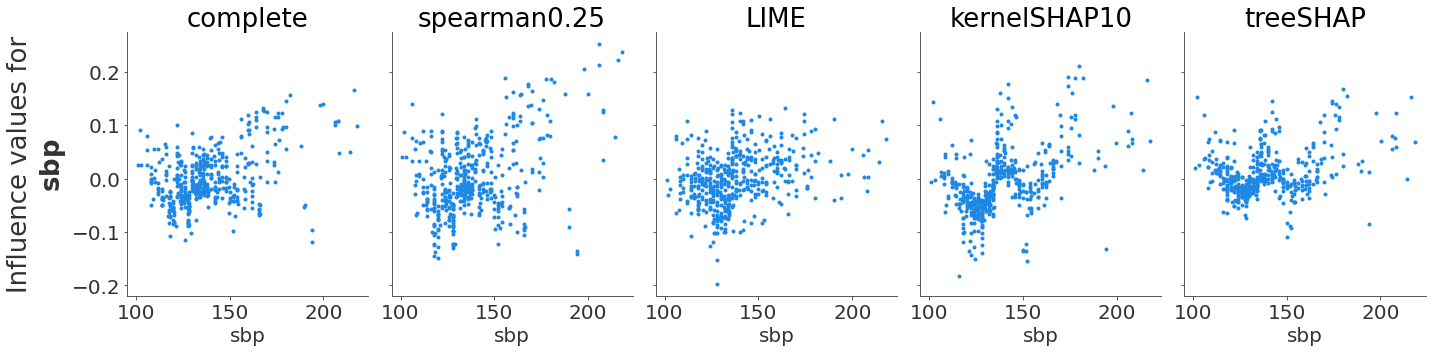

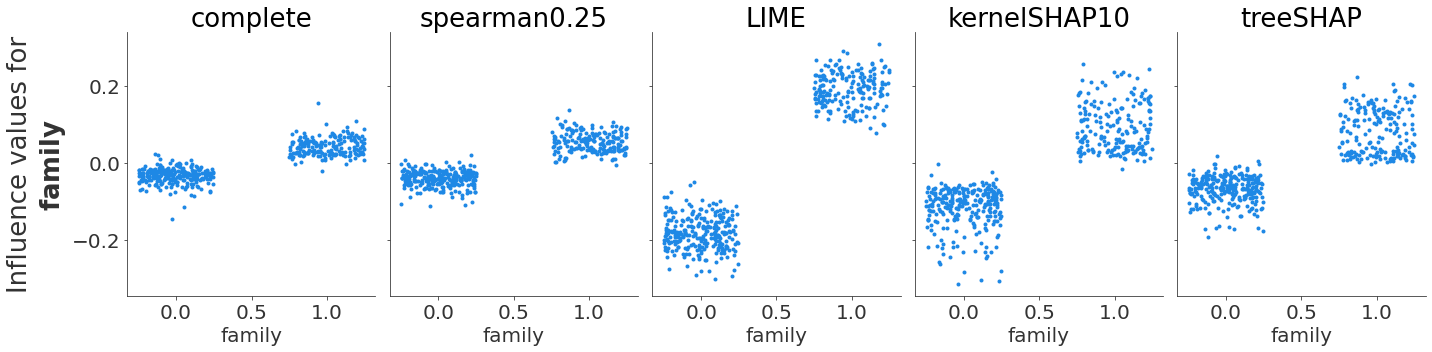

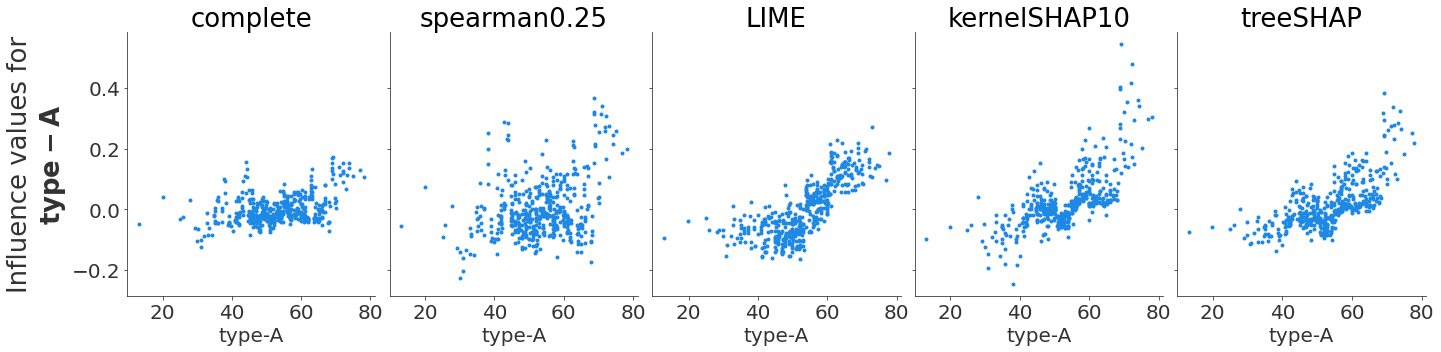

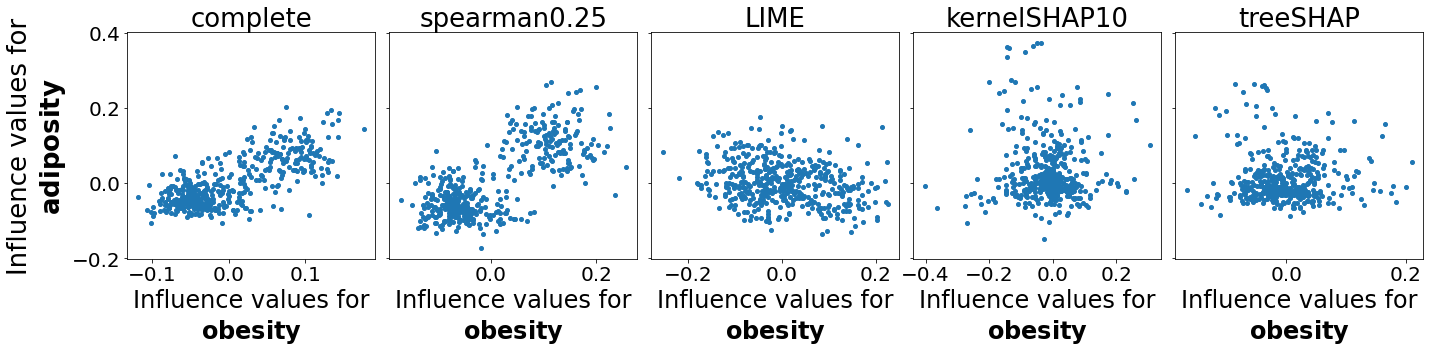

In [46]:
model_name = "XGBoost"
methods = [method for method in dict_bootstrap_0['Mean'][model_name] if not method.endswith("accuracy")]
cli.summary_subplots(dict_list_shap_values[model_name], X.rename(dict_names_reducted, axis=1), list_names=methods)
cli.partial_dependance_plots(dict_list_shap_values[model_name],X.rename(dict_names_reducted, axis=1),list_names=methods)#, save_path="figures/SA_Heart/"+model+"/")
cli.interaction_dependence_plots(dict_list_shap_values[model_name],[('obesity','adiposity')],X,list_names=methods)#, save_path="figures/SA_Heart/"+model+"/")

# SVM

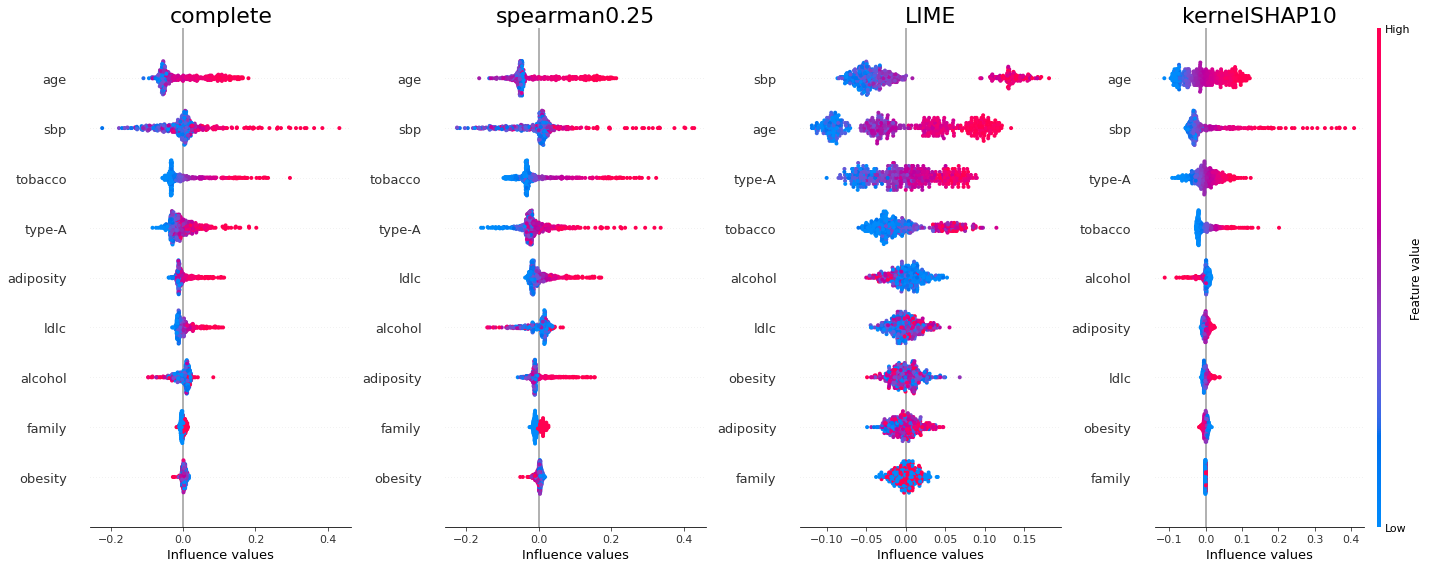

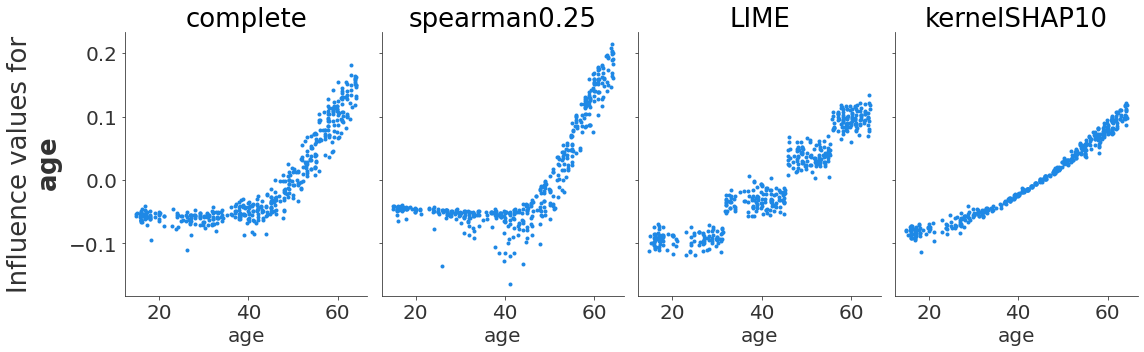

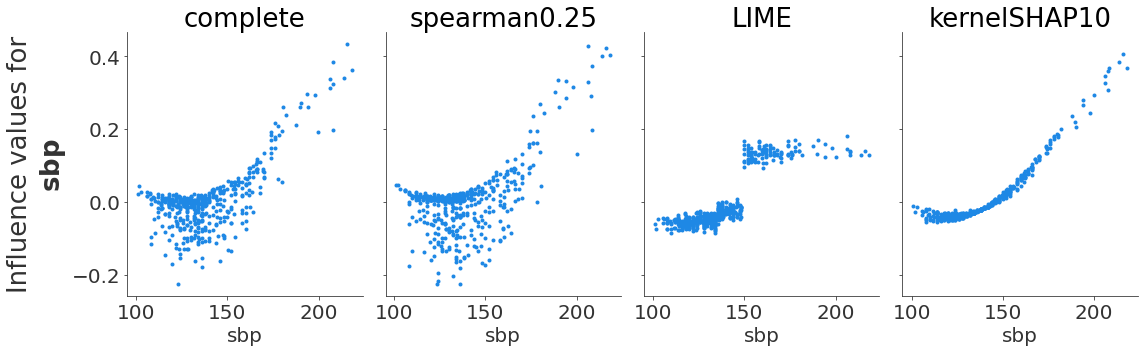

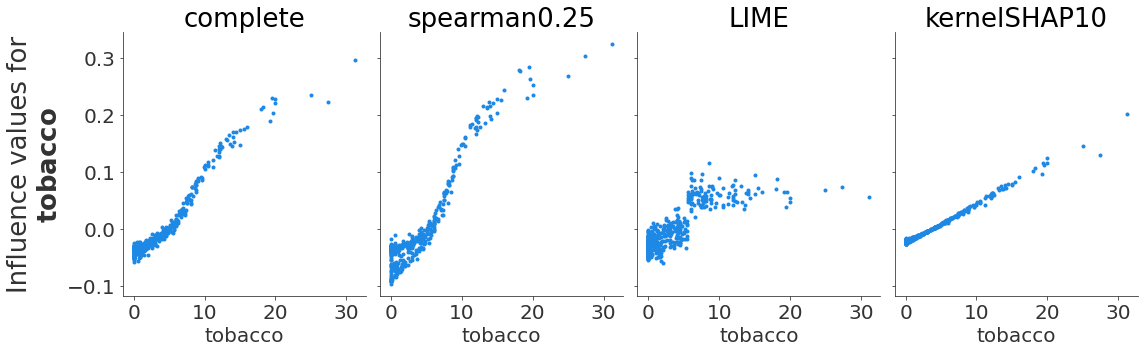

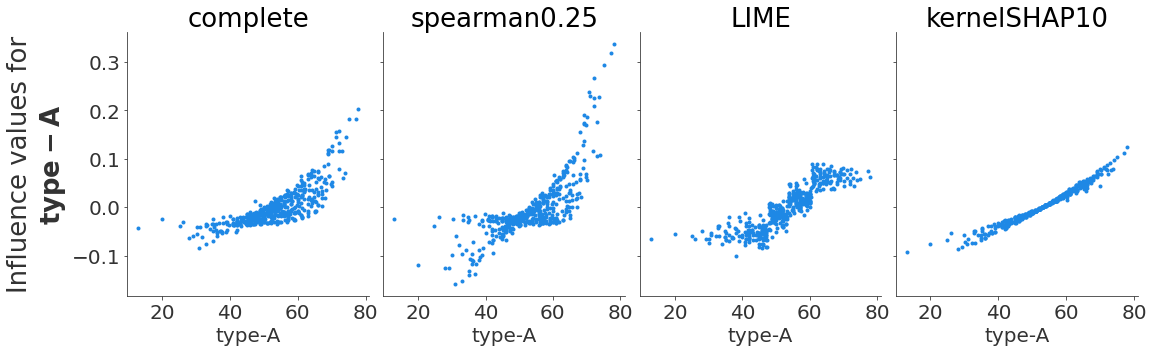

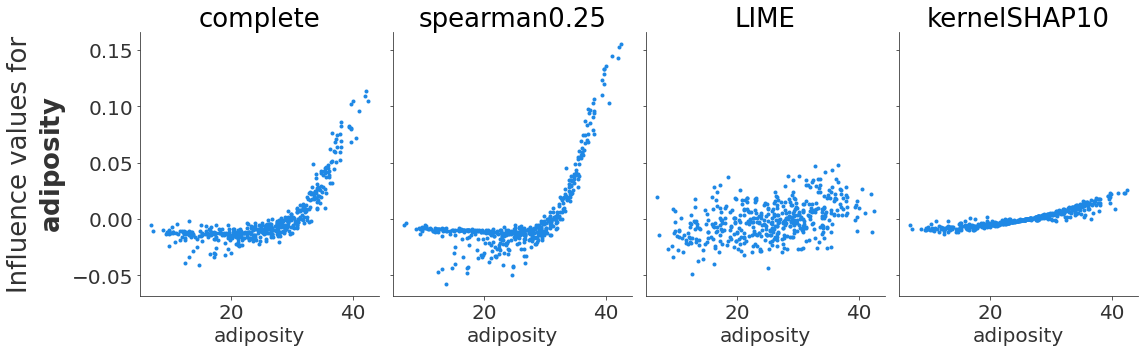

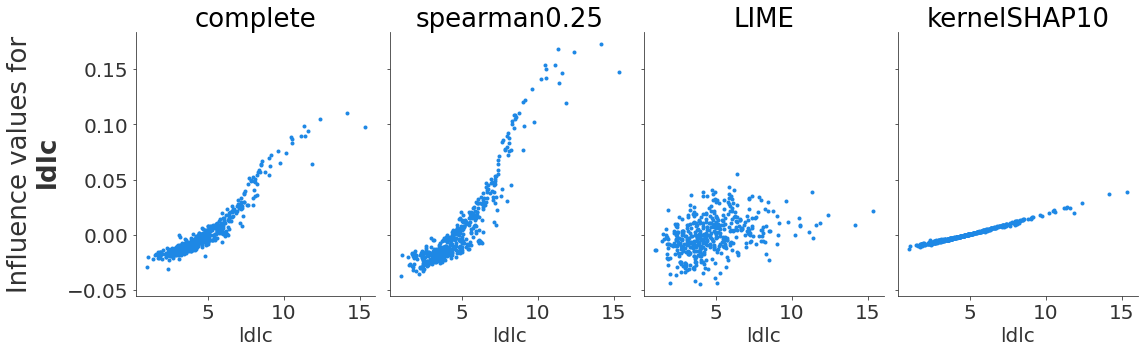

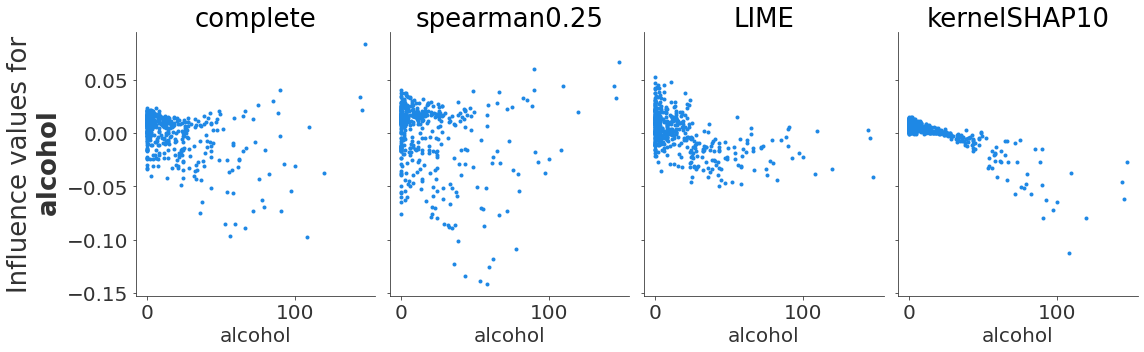

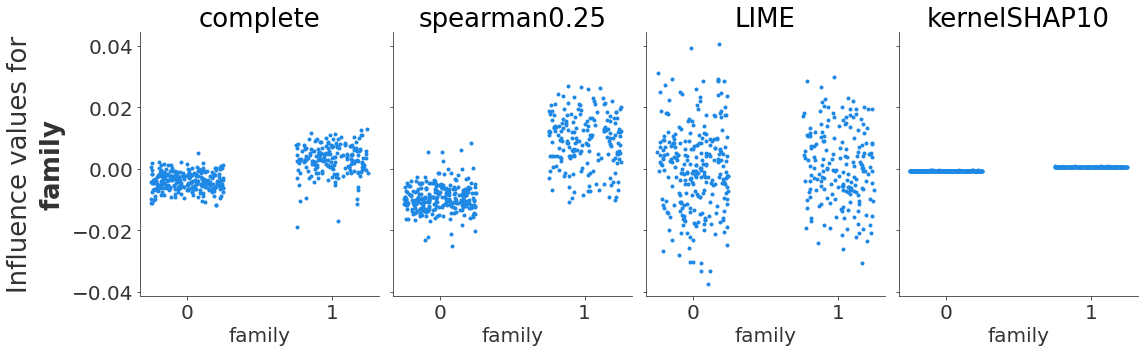

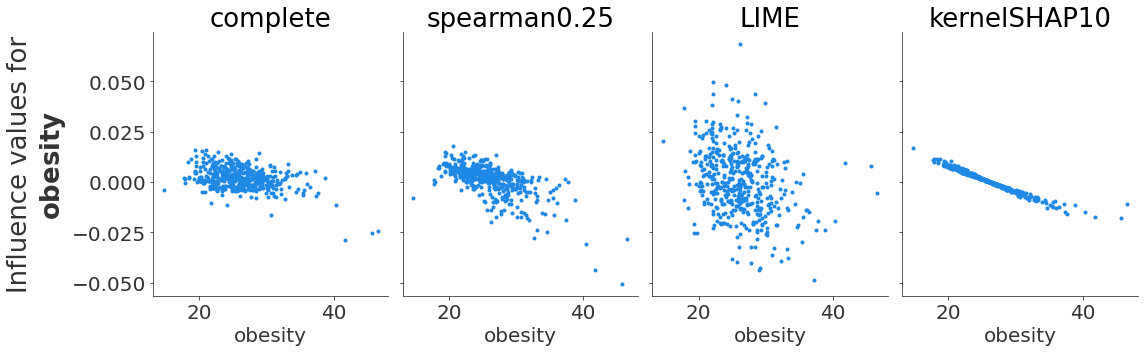

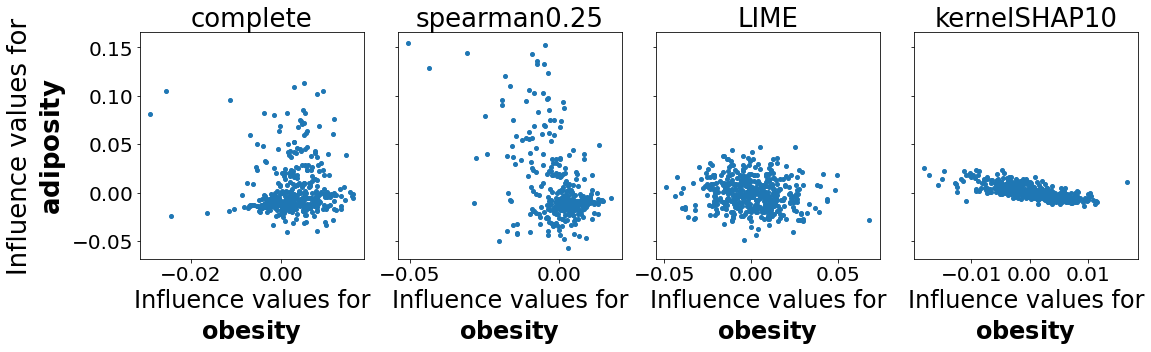

In [47]:
model_name = "SVM"
methods = [method for method in dict_bootstrap_0['Mean'][model_name] if not method.endswith("accuracy")]
cli.summary_subplots(dict_list_shap_values[model_name], X.rename(dict_names_reducted, axis=1), list_names=methods)
cli.partial_dependance_plots(dict_list_shap_values[model_name],X.rename(dict_names_reducted, axis=1),list_names=methods)#, save_path="figures/SA_Heart/"+model+"/")
cli.interaction_dependence_plots(dict_list_shap_values[model_name],[('obesity','adiposity')],X,list_names=methods)#, save_path="figures/SA_Heart/"+model+"/")

# Logistic Regression

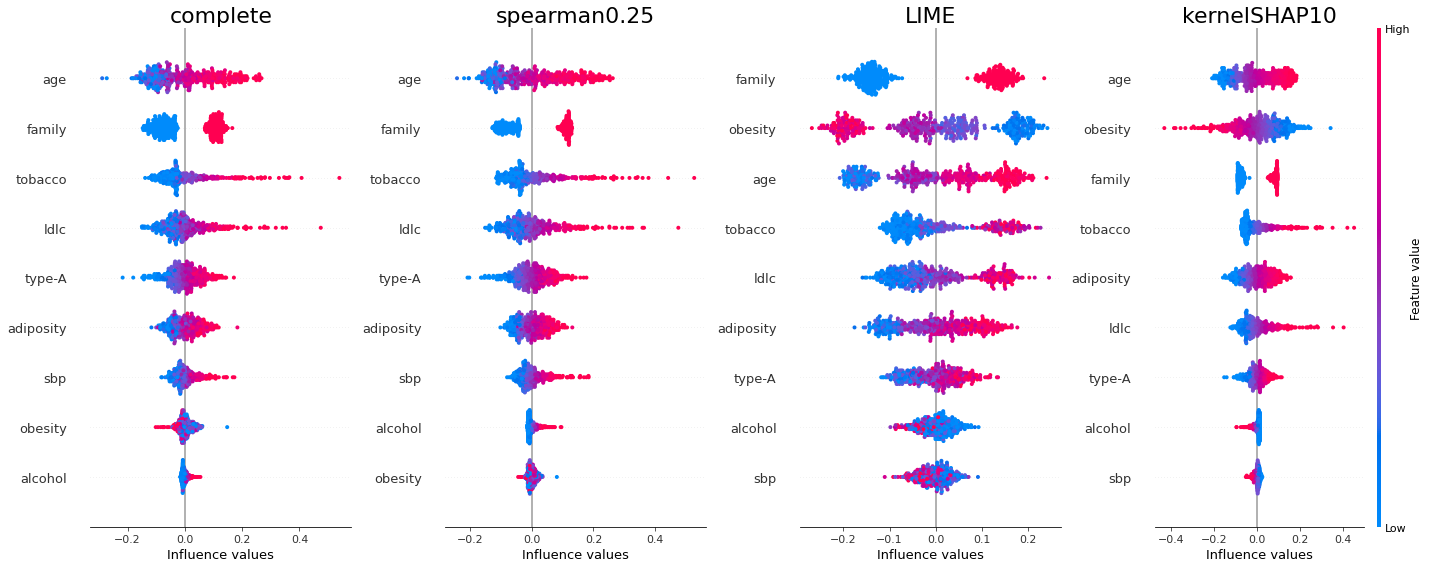

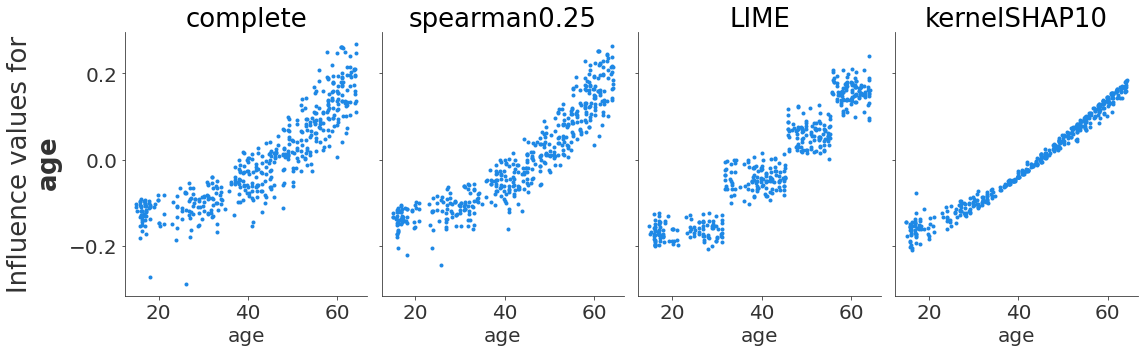

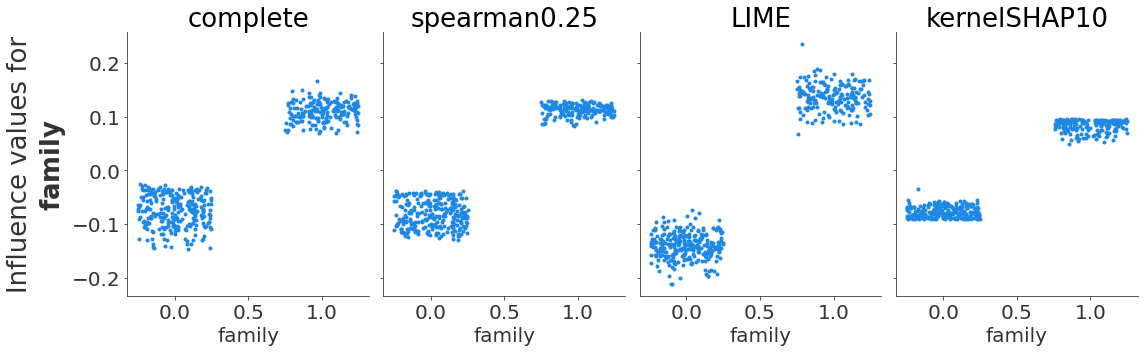

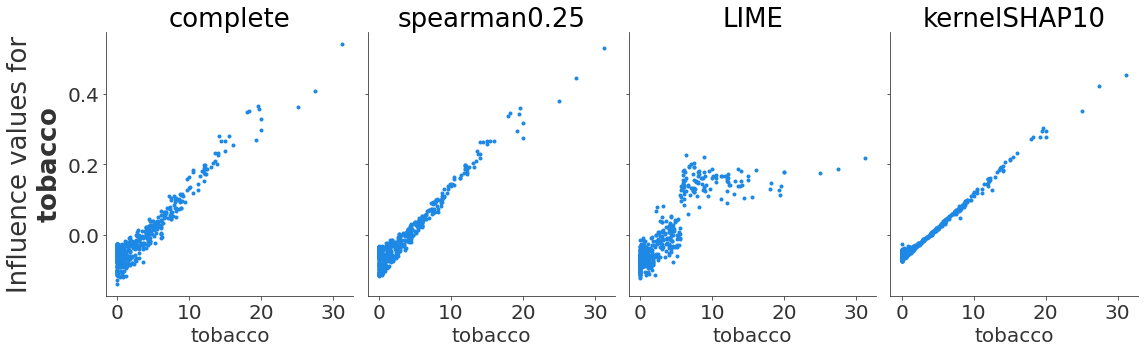

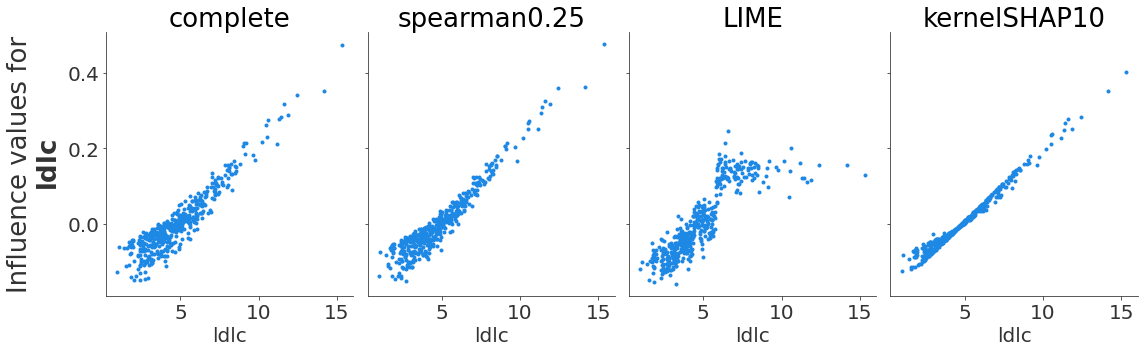

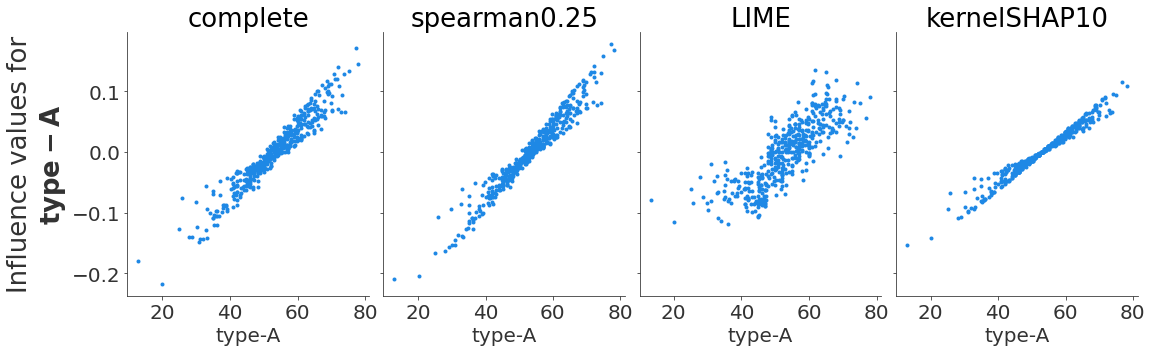

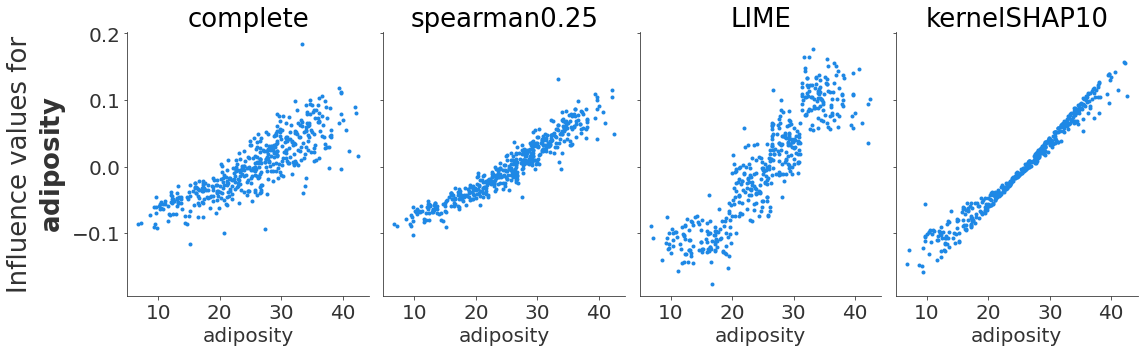

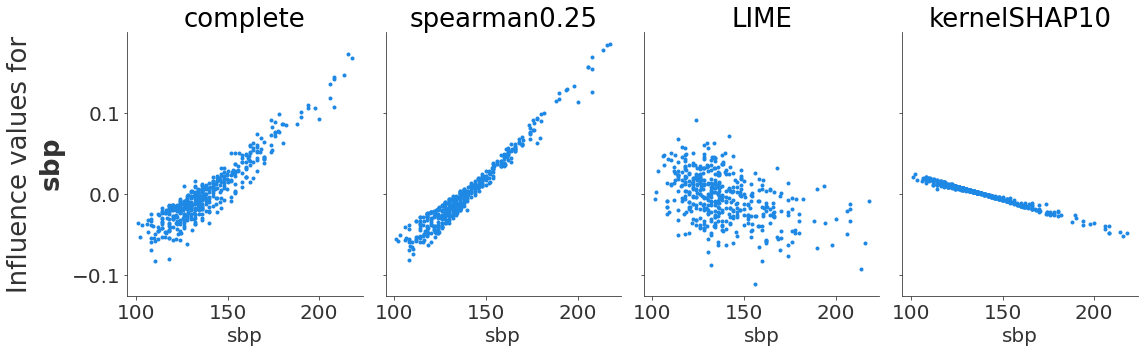

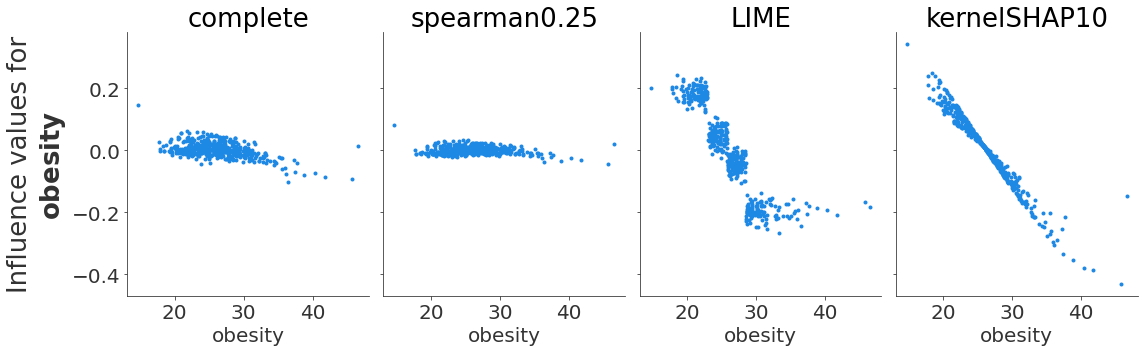

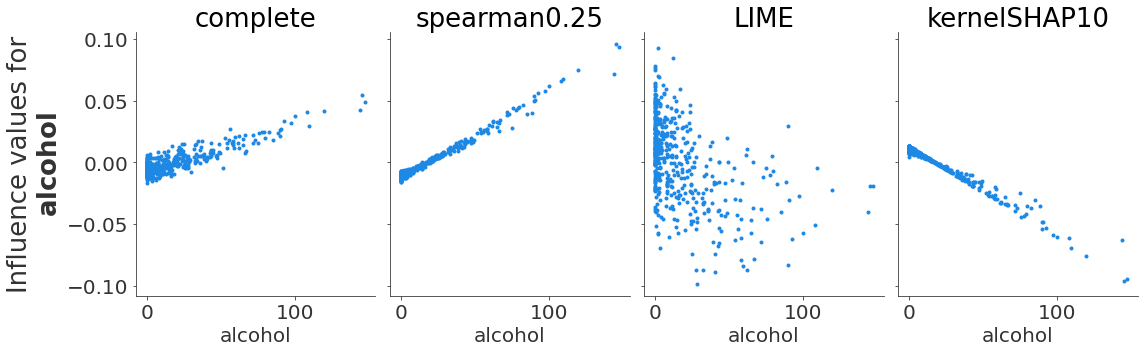

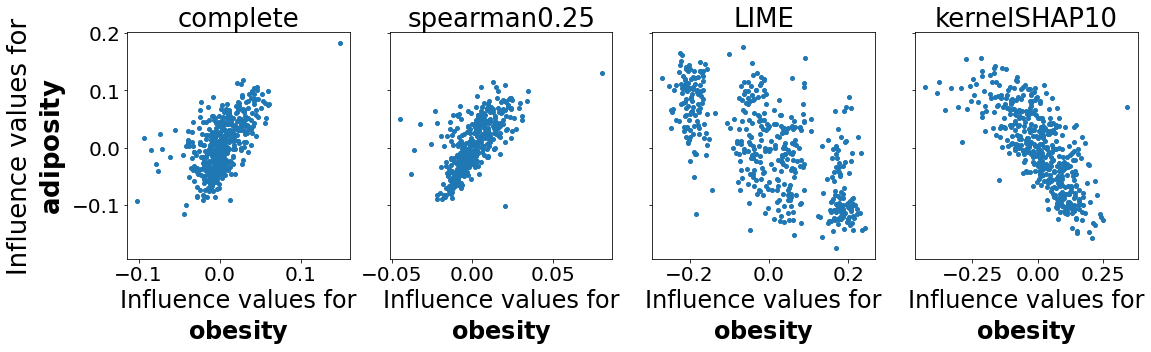

In [48]:
model_name = "Logistic Regression"
methods = [method for method in dict_bootstrap_0['Mean'][model_name] if not method.endswith("accuracy")]
cli.summary_subplots(dict_list_shap_values[model_name], X.rename(dict_names_reducted, axis=1), list_names=methods)
cli.partial_dependance_plots(dict_list_shap_values[model_name],X.rename(dict_names_reducted, axis=1),list_names=methods)#, save_path="figures/SA_Heart/"+model+"/")
cli.interaction_dependence_plots(dict_list_shap_values[model_name],[('obesity','adiposity')],X,list_names=methods)#, save_path="figures/SA_Heart/"+model+"/")